# Four Layer Neural Network with Pima Dataset

### What is a Neural Network?
A Neural Network is a computational model inspired by the structure and functioning of the human brain, designed to recognize patterns, make decisions, and solve complex problems. It is a core component of deep learning and consists of interconnected layers of nodes (neurons). Each node processes input data by applying weights, biases, and an activation function, and then passes the result to the next layer.

Neural networks excel in tasks such as image recognition, natural language processing, and prediction by learning from data. They are highly flexible and capable of approximating non-linear relationships, making them suitable for a wide range of applications.

In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
x = df.iloc[:, :-1]  # All rows, all columns except the last one
y = df.iloc[:, -1]   # All rows, only the last column

In [5]:
from sklearn.model_selection import train_test_split

# Assuming x contains the features and y contains the labels
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
model = Sequential()

# Input layer with 12 neurons (assuming x_train has 8 features) and first hidden layer with 16 neurons
model.add(Dense(16, input_dim=x_train.shape[1], activation='relu'))

# Second hidden layer with 12 neurons
model.add(Dense(12, activation='relu'))

# Third hidden layer with 8 neurons
model.add(Dense(8, activation='relu'))

# Output layer with 1 neuron (for binary classification) and sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Step 2: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\Suvadip\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4518 - loss: 3.9250 - val_accuracy: 0.6623 - val_loss: 0.9238
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6203 - loss: 0.9332 - val_accuracy: 0.6429 - val_loss: 0.7911
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6478 - loss: 0.7677 - val_accuracy: 0.6623 - val_loss: 0.6838
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6447 - loss: 0.6951 - val_accuracy: 0.6429 - val_loss: 0.7404
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6385 - loss: 0.7086 - val_accuracy: 0.7013 - val_loss: 0.6617
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6253 - loss: 0.6661 - val_accuracy: 0.6558 - val_loss: 0.6501
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6523 - loss: 0.6677 - val_accuracy: 0.6558 - val_loss: 0.6477
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6684 - loss: 0.6241 - val_accuracy: 0.6883 - v

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy of Neural Network: 75.32%


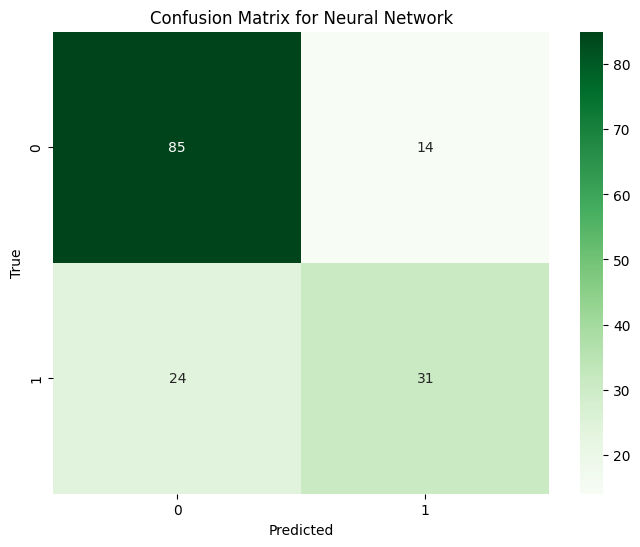

In [8]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Step 5: Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Neural Network: {accuracy * 100:.2f}%")

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Neural Network')
plt.show()